# AI/MLPrediction of Heart Disease

In this project, we are to build a machine learning that would be used to predict onset of potential heart disease using historical data with key indicator features.

Data contains:

 - age -age in years
 - sex -(1 = male; 0 = female)
 - cp -chest pain type
 - trestbps -resting blood pressure (in mm Hg on admission to the hospital)
 - chol -serum cholestoral in mg/dl
 - fbs -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - restecg -resting electrocardiographic results
 - thalach -maximum heart rate achieved
 - exang-exercise induced angina (1 = yes; 0 = no)
 - oldpeak -ST depression induced by exercise relative to rest
 - slope -the slope of the peak exercise ST segment (https://litfl.com/st-segment-ecg-library/)
 - ca -number of major vessels (0-3) colored by flourosopy
 - thal - A blood disorder called thalassemia -3 = normal; 6 = fixed defect; 7 = reversable defect
 - target -have disease or not (1=yes, 0=no)

This is a Classification problem. We are going to use the target variable (1=yes, 0=no), to build a model that predicts whether future patients have the disease or not.

__Task 1:__ Load the data and perform exploratory data analysis. Use 5 –8 plots including pie chart, scatter plot, bar charts and histograms in your exploration.<br>
__Task 2:__ Build a Logistic regression, Random Forest and Support Vector Machine Models.<br>
__Task 3:__ Compare the accuracies of thethree models.<br>
__Task 4:__ Prepare a Power Point presentationof nomore than 15 slidesof your project for stakeholders’meeting.

We will start by importing necessary libraries as we learned.


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Task 1

In [124]:
# load the data
df = pd.read_csv("heart_disease_data.csv")

# Explore the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis

It's always important as stated in our classes to explore the data and get a feel of it before building models.
We can do different kinds of plots.

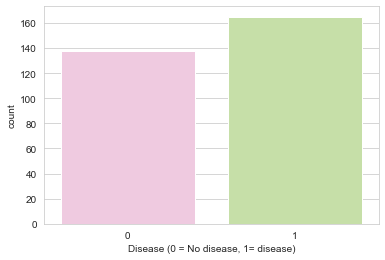

In [125]:
# Explore the target variable

sns.countplot(x="target", data=df, palette="PiYG")
plt.xlabel("Disease (0 = No disease, 1= disease)")
plt.show()

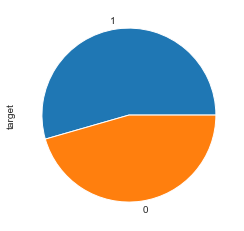

In [126]:
# Pie chart
df.target.value_counts().plot(kind='pie')

In [127]:
# Calculate percentage of those with disease

no_disease = len(df[df.target == 0])
disease = len(df[df.target == 1])
print("Percentage of Patients without disease: {:.2f}%".format((no_disease / (len(df.target))*100)))
print("Percentage of Patients with isease: {:.2f}%".format((disease / (len(df.target))*100)))

Percentage of Patients without disease: 45.54%
Percentage of Patients with isease: 54.46%


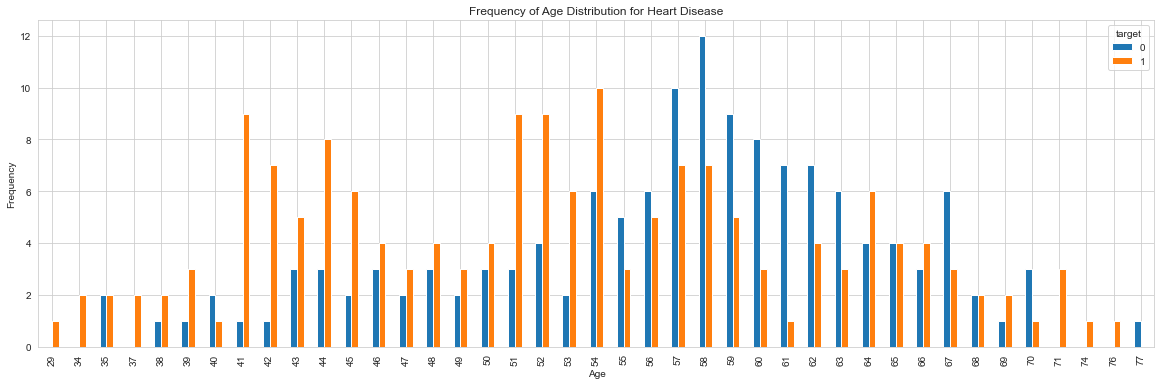

In [128]:
# Show frequency of age distribution for those with the disease

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Frequency of Age Distribution for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('distOfHeartDisease.png')

Text(0, 0.5, 'Frequency')

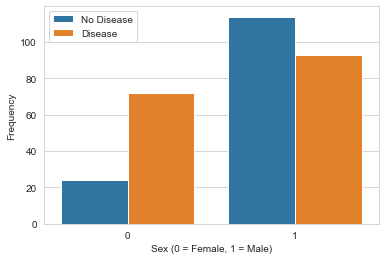

In [129]:
sns.countplot(x='sex',data=df, hue='target')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

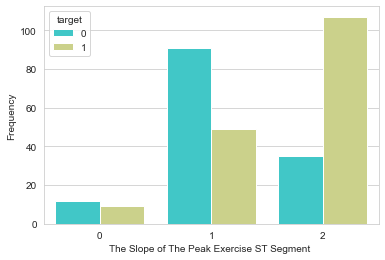

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='slope',hue='target',data=df,palette='rainbow')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

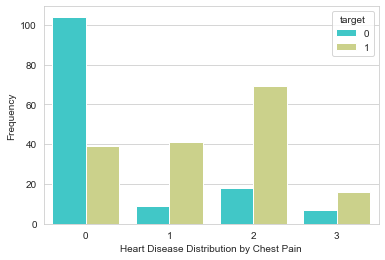

In [131]:
#sns.set_style('whitegrid')
sns.countplot(x='cp',hue='target',data=df,palette='rainbow')
plt.xlabel('Heart Disease Distribution by Chest Pain')
plt.ylabel('Frequency')

### Convert Categorical Features to Dummy variables

In [132]:
## drop the first to avoid multicolinearity
chest_pain = pd.get_dummies(df['cp'],drop_first=True)


fasting_blood_sugar = pd.get_dummies(df['fbs'],drop_first=True)
resting_ecg = pd.get_dummies(df['restecg'],drop_first=True)
exercise_ang = pd.get_dummies(df['exang'],drop_first=True)
st_slope = pd.get_dummies(df['slope'],drop_first=True)
thalassemia = pd.get_dummies(df['thal'],drop_first=True)

In [133]:
thalassemia

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
298,0,0,1
299,0,0,1
300,0,0,1
301,0,0,1


In [134]:
# drop the categorical variables

df.drop(['cp','fbs','restecg','exang','slope','thal'],axis=1,inplace=True)

In [135]:
# join the data with the dummy variables
df = pd.concat([df, chest_pain, fasting_blood_sugar,resting_ecg,exercise_ang,st_slope,thalassemia],axis=1)
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,ca,target,1,2,3,1,1,2,1,1,2,1,2,3
0,63,1,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,0,1,1,0,0,0,0,0,0,0,1,0,1,0
3,56,1,120,236,178,0.8,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,163,0.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0


## Task 2: Model Building
    
We will build Logistic regression, Random Forest and Support Vector Machine Models

In [160]:
#train.drop will drop specified labels from rows or columns
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.2, 
                                                    random_state=106)

In [161]:
logmodel = LogisticRegression(max_iter=1500)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1500)

In [162]:
logr_y_pred = logmodel.predict(x_test)

In [163]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, logr_y_pred))
#Accuracy: 0.8524590163934426

Accuracy: 0.8524590163934426


In [164]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [165]:
# Normalize data 
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


In [166]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [69]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [167]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,ca,1,2,3,1,1,2,1,1,2,1,2,3
74,0.291667,0.0,0.264151,0.198630,0.717557,0.032258,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.618321,0.000000,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64,0.604167,1.0,0.433962,0.194064,0.717557,0.000000,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
296,0.708333,0.0,0.283019,0.162100,0.496183,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.709924,0.000000,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.291667,1.0,0.358491,0.276256,0.549618,0.016129,1.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
192,0.520833,1.0,0.245283,0.141553,0.320611,0.225806,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
117,0.562500,1.0,0.245283,0.152968,0.694656,0.306452,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
47,0.375000,1.0,0.415094,0.299087,0.648855,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [70]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


### Using SVM

In [152]:
#Import svm model

#Create a svm Classifier
svmmodel = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmmodel.fit(x_train, y_train)

#Predict the response for test dataset
svm_y_pred = svmmodel.predict(x_test)

In [153]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, svm_y_pred))

Accuracy: 0.8524590163934426


### Using Decision Tree

In [154]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train, y_train)

#Predict the response for test dataset
dt_y_pred = dtmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))


Accuracy: 0.7213114754098361


In [87]:
def best_accuracy(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, preds)
    return(acc)

In [116]:
for max_leaf_nodes in [5, 10, 50, 100, 250, 500]:
    
    acc = best_accuracy(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("max_leaf_nodes: {:d}, Accuracy: {:.5f}".format(max_leaf_nodes,acc))

max_leaf_nodes: 5, Accuracy: 0.70492
max_leaf_nodes: 10, Accuracy: 0.73770
max_leaf_nodes: 50, Accuracy: 0.60656
max_leaf_nodes: 100, Accuracy: 0.60656
max_leaf_nodes: 250, Accuracy: 0.60656
max_leaf_nodes: 500, Accuracy: 0.60656


#### Run the model again with the optimised max_leaf_nodes

In [155]:
dtmodel = DecisionTreeClassifier(max_leaf_nodes=5)
dtmodel.fit(x_train, y_train)

#Predict the response for test dataset
dt_y_pred = dtmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))


Accuracy: 0.7540983606557377


### Using Random Forest

In [157]:
# Random Forest Classification
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)

#Predict the response for test dataset
rf_y_pred = rfmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, rf_y_pred))


Accuracy: 0.819672131147541


In [118]:
def rf_best_accuracy(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, preds)
    return(acc)

In [119]:
for max_leaf_nodes in [5, 10, 50, 100, 250, 500]:
    
    acc = rf_best_accuracy(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("max_leaf_nodes: {:d}, Accuracy: {:.5f}".format(max_leaf_nodes,acc))

max_leaf_nodes: 5, Accuracy: 0.83607
max_leaf_nodes: 10, Accuracy: 0.80328
max_leaf_nodes: 50, Accuracy: 0.81967
max_leaf_nodes: 100, Accuracy: 0.81967
max_leaf_nodes: 250, Accuracy: 0.81967
max_leaf_nodes: 500, Accuracy: 0.81967


In [159]:
rfmodel = RandomForestClassifier(max_leaf_nodes=5)
rfmodel.fit(x_train, y_train)

#Predict the response for test dataset
rf_y_pred = rfmodel.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, rf_y_pred))


Accuracy: 0.8360655737704918


### Task 3: Comparing Accuracies


Logistic Regression Model: __85.2%__<br>
SVM: __83.6%__<br>
Decision Tree: __70.5%__<br>
Random Forest: __83.6%__

##### Conclusion

Having compare the machine learning models, the Logistic Regression model in this best performing model overall and should be used for the detecting of heart disease.